In [960]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
from collections import Counter

# Importing the dataset

In [961]:
df = pd.read_csv('data.csv')
df.drop('Unnamed: 32', axis=1, inplace=True)

In [962]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

# Preprocessing

* Convert into numpy arrays
* Scale features
* Separate labels from features
* Split into train / test sets
* Convert to tensors

## Convert to numpy

In [963]:
data = df.to_numpy()

## Separate labels from features

In [964]:
labels = data[:, 1].reshape(569, 1)
train_y, test_y = labels[:284, 0], labels[284:568, 0]
data = data[:, 2:32]

## Convert letter labels into digits

In [965]:
for i in range(len(train_y)):
        if train_y[i] == 'M':
            train_y[i] = 1
        else:
            train_y[i] = 0

for i in range(len(train_y)):
        if test_y[i] == 'M':
            test_y[i] = 1
        else:
            test_y[i] = 0

## Check out distribution of labels

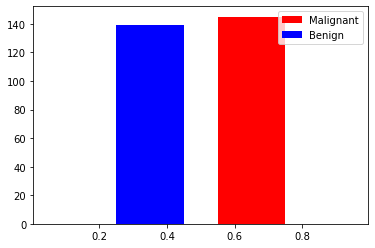

In [966]:
l = list()
b = list()
for num in train_y:
    if num == 1:
        l.append(num)
    else:
        b.append(num)
labels = ['Malignant', 'Benign']
colors = ['red', 'blue']
plt.hist([l, b], 2, label=labels, color=colors)
plt.legend(loc='upper right')


# Convert label arrays to tensors

In [967]:
train_y = torch.from_numpy(train_y.astype(np.float32)).reshape(train_y.shape[0], 1)
test_y = torch.from_numpy(test_y.astype(np.float32)).reshape(test_y.shape[0], 1)

# Plot data as scatterplot, with y-axis being its features summed

Text(0, 0.5, 'Sum of features')

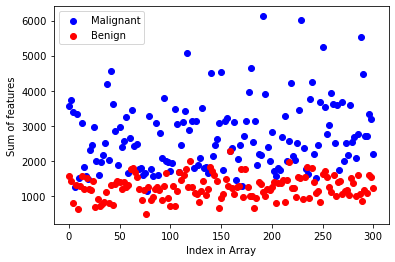

In [968]:
m = list()
b = list()
for example, label in zip(data[:284], train_y):
    val = np.sum(example)
    if label == 1:
        m.append(val)
    else:
        b.append(val)
x = np.linspace(0, 300, len(m))
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, m, color='b')
x = np.linspace(0, 300,len(b))
ax1.scatter(x, b, color='r')
ax1.legend(['Malignant', 'Benign'])
plt.xlabel('Index in Array')
plt.ylabel('Sum of features')

## Perform feature scaling

In [969]:
scaler = sklearn.preprocessing.StandardScaler()
data = scaler.fit_transform(data)

## Separate remaining features into train / test sets & convert to tensors

In [970]:
train_feats = torch.from_numpy(data[:284].astype(np.float32))
test_feats = torch.from_numpy(data[284:568].astype(np.float32))

# Create logistic regression model to following specs:

* The only layers will be the input and output layers
* The two layers are fully connected
* Output is computed with the sigmoid function

In [971]:
class LogisticRegression(nn.Module):
    def __init__(self, in_dim):
        super(LogisticRegression, self).__init__()
        self.output = nn.Linear(30, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y = self.output(x)
        y = self.sigmoid(y)
        return y

# Initialize model along with its loss function and optimizer

In [972]:
m = LogisticRegression(30)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(m.parameters(), lr=.01)

# Minimize cost function to find optimal weights

In [973]:
losses = list()
epochs = 1000
for i in range(epochs):
    output = m(train_feats)
    loss = criterion(output, train_y)
    if (i + 1) % 70 == 0:
        losses.append(loss.item())
    if (i + 1) % 100 == 0 or i == epochs - 1:
        print(f'epoch #{i}, loss: {loss}, weight: {m.output.weight}')
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

epoch #99, loss: 0.08540231734514236, weight: Parameter containing:
tensor([[ 0.5616,  0.4843,  0.5235,  0.2430,  0.2613,  0.2789,  0.2004,  0.3162,
          0.0632, -0.3215,  0.2570, -0.1350,  0.4017,  0.2773,  0.1081, -0.1724,
         -0.2084,  0.2780, -0.3890, -0.2572,  0.6023,  0.6001,  0.5192,  0.5534,
          0.4005,  0.1297,  0.4398,  0.4607,  0.4957,  0.1246]],
       requires_grad=True)
epoch #199, loss: 0.06399856507778168, weight: Parameter containing:
tensor([[ 0.6663,  0.7311,  0.6241,  0.3575,  0.2452,  0.2268,  0.2833,  0.3811,
          0.0200, -0.4742,  0.4314, -0.3340,  0.5503,  0.4426,  0.2286, -0.3336,
         -0.2181,  0.3134, -0.4279, -0.4437,  0.7510,  0.8661,  0.6582,  0.7115,
          0.6030,  0.1520,  0.5648,  0.5906,  0.7152,  0.2441]],
       requires_grad=True)
epoch #299, loss: 0.05438855662941933, weight: Parameter containing:
tensor([[ 0.7330,  0.8931,  0.6887,  0.4350,  0.2299,  0.1611,  0.3494,  0.4143,
          0.0084, -0.5879,  0.5813, -0.5168

# Plot loss through all epochs

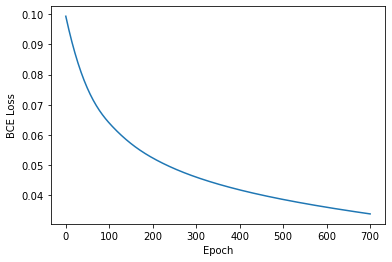

In [974]:
from scipy.interpolate import make_interp_spline, BSpline
x = np.linspace(0, 700, 14)
y = losses
x_new = np.linspace(x.min(), x.max(), 400)
spl = make_interp_spline(x, y)
y_smooth = spl(x_new)
plt.plot(x_new, y_smooth)
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.show()

# Test accuracy against test set

In [975]:
with torch.no_grad():
    y_pred=m(test_feats)
    y_pred_class=y_pred.round()
    accuracy=((y_pred_class == test_y).sum()) / 284
    print(f'Accuracy: {round(accuracy.item() * 100, 1)}%')

Accuracy: 97.2%
